In [177]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [178]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_excel("/content/drive/MyDrive/Dirty_data_1.xlsx")

In [179]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1202 entries, 0 to 1201
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Gender            1147 non-null   float64
 1   Age               1145 non-null   float64
 2   Married           1138 non-null   float64
 3   Employment        1128 non-null   float64
 4   Two_Four_Wheeler  1115 non-null   float64
 5   Cinema_Likes      1102 non-null   float64
 6   Money             1112 non-null   float64
dtypes: float64(7)
memory usage: 65.9 KB


In [180]:
df.shape

(1202, 7)

In [181]:
df.columns

Index(['Gender', 'Age', 'Married', 'Employment', 'Two_Four_Wheeler',
       'Cinema_Likes', 'Money'],
      dtype='object')

In [182]:
df.describe()

,Gender,Age,Married,Employment,Two_Four_Wheeler,Cinema_Likes,Money
count,1147.000000,1145.000000,1138.000000,1128.000000,1115.000000,1102.000000,1.112000e+03
mean,1.510026,24.058515,0.503515,3.034574,0.524664,2.005445,7.806100e+05
std,0.500118,8.839926,0.500207,1.422238,0.499615,0.817590,2.209683e+05
min,1.000000,6.000000,0.000000,1.000000,0.000000,1.000000,1.505330e+05
25%,1.000000,21.000000,0.000000,2.000000,0.000000,1.000000,6.407075e+05
50%,2.000000,23.000000,1.000000,3.000000,1.000000,2.000000,7.714740e+05
75%,2.000000,24.000000,1.000000,4.000000,1.000000,3.000000,8.981915e+05
max,2.000000,99.000000,1.000000,5.000000,1.000000,3.000000,1.976745e+06


In [183]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1197     True
1198     True
1199     True
1200     True
1201     True
Length: 1202, dtype: bool

In [184]:
df.drop_duplicates()

,Gender,Age,Married,Employment,Two_Four_Wheeler,Cinema_Likes,Money
0,2.0,45.0,1.0,2.0,1.0,3.0,NaN
1,1.0,23.0,1.0,1.0,0.0,NaN,988373.0
2,NaN,21.0,0.0,5.0,NaN,3.0,NaN
3,1.0,25.0,1.0,3.0,NaN,2.0,874040.0
4,1.0,24.0,NaN,2.0,0.0,3.0,947871.0
...,...,...,...,...,...,...,...
995,2.0,22.0,0.0,4.0,0.0,3.0,622946.0
996,1.0,25.0,1.0,2.0,1.0,3.0,876630.0
997,2.0,24.0,0.0,2.0,0.0,1.0,694498.0
998,2.0,22.0,0.0,1.0,0.0,1.0,903488.0


In [185]:
df.shape

(1202, 7)

In [186]:
#Handling Outliers
## Percentile method
### IQR Method
####Standard Deviation Method

In [187]:
#continous data --> variable possesses range
#categorical data --> variable doesn't possesses range
p0=df.Money.min()
p100=df.Money.max()
q1=df.Money.quantile(0.25)    #25th Quantile value
q2=df.Money.quantile(0.5)     #50th Quantile value
q3=df.Money.quantile(0.75)    #75th Quantile value

iqr=q3 - q1  #Inter quantile  range

In [188]:
lower_cutoff= q1 - 1.5*iqr            #if lower_cutoff<p0 --> There are NO outliers on the lower side
upper_cutoff= q3 + 1.5*iqr            # if upper_cutoff>p100 --> There are NO ouliers in the Upper side
print(lower_cutoff,upper_cutoff)

254481.5 1284417.5


In [189]:
print("p0 =",p0,
      "\np100 =",p100,
      "\nlc =",lower_cutoff,
      "\nuc =",upper_cutoff)

p0 = 150533.0 
p100 = 1976745.0 
lc = 254481.5 
uc = 1284417.5


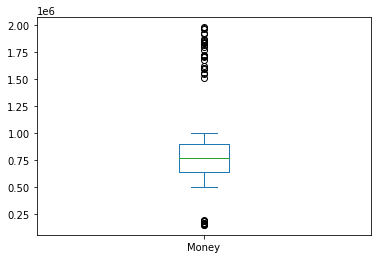

In [190]:
df.Money.plot(kind='box')  #using pandas

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


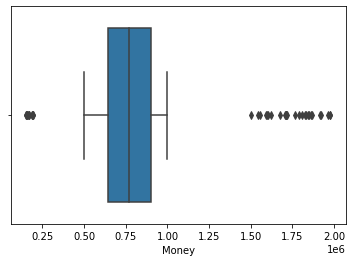

In [191]:
sns.boxplot(df['Money'])   #using Seaborn

In [192]:
#Outlier Treatment
## Clipping all values greater than the upper cutoff to the upper cutoff

df.Money.clip(upper=upper_cutoff)

0            NaN
1       988373.0
2            NaN
3       874040.0
4       947871.0
          ...   
1197    622946.0
1198    876630.0
1199    694498.0
1200    903488.0
1201    702014.0
Name: Money, Length: 1202, dtype: float64

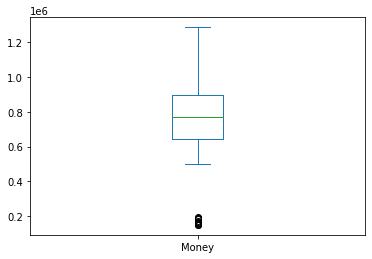

In [193]:
df.Money.clip(upper=upper_cutoff,inplace=True)
df.Money.plot(kind='box')

In [194]:
df.Money.clip(lower=lower_cutoff)


0            NaN
1       988373.0
2            NaN
3       874040.0
4       947871.0
          ...   
1197    622946.0
1198    876630.0
1199    694498.0
1200    903488.0
1201    702014.0
Name: Money, Length: 1202, dtype: float64

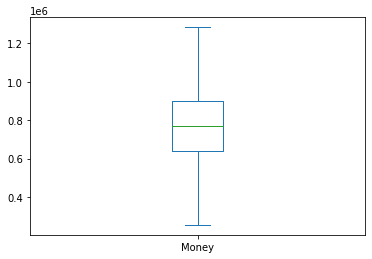

In [195]:
df.Money.clip(lower=lower_cutoff,inplace=True)
df.Money.plot(kind='box')

In [196]:
df.shape

(1202, 7)

In [197]:
# Handling missing values
df.isna().sum().sort_values(ascending=False)

Cinema_Likes        100
Money                90
Two_Four_Wheeler     87
Employment           74
Married              64
Age                  57
Gender               55
dtype: int64

In [198]:
df.Cinema_Likes.mode()[0]
df.Cinema_Likes.fillna(df.Cinema_Likes.mode()[0],inplace=True)
df.isna().sum()

Gender              55
Age                 57
Married             64
Employment          74
Two_Four_Wheeler    87
Cinema_Likes         0
Money               90
dtype: int64

In [199]:
df.Gender.mode()[0]
df.Gender.fillna(df.Gender.mode()[0],inplace=True)
df.isna().sum()

Gender               0
Age                 57
Married             64
Employment          74
Two_Four_Wheeler    87
Cinema_Likes         0
Money               90
dtype: int64

In [200]:
df.Married.mode()[0]
df.Married.fillna(df.Married.mode()[0],inplace=True)
df.isna().sum()

Gender               0
Age                 57
Married              0
Employment          74
Two_Four_Wheeler    87
Cinema_Likes         0
Money               90
dtype: int64

In [201]:
df.Two_Four_Wheeler.mode()[0]
df.Two_Four_Wheeler.fillna(df.Two_Four_Wheeler.mode()[0],inplace=True)
df.isna().sum()

Gender               0
Age                 57
Married              0
Employment          74
Two_Four_Wheeler     0
Cinema_Likes         0
Money               90
dtype: int64

In [202]:
df.Employment.mode()[0]
df.Employment.fillna(df.Employment.mode()[0],inplace=True)
df.isna().sum()

Gender               0
Age                 57
Married              0
Employment           0
Two_Four_Wheeler     0
Cinema_Likes         0
Money               90
dtype: int64

In [203]:
df.isna().sum().sort_values(ascending=False)

Money               90
Age                 57
Gender               0
Married              0
Employment           0
Two_Four_Wheeler     0
Cinema_Likes         0
dtype: int64

In [204]:
df.Money.mode()[0]
df.Money.fillna(df.Money.mode()[0],inplace=True)
df.isna().sum()

Gender               0
Age                 57
Married              0
Employment           0
Two_Four_Wheeler     0
Cinema_Likes         0
Money                0
dtype: int64

In [205]:
df.Age.mode()[0]
df.Age.fillna(df.Age.mode()[0],inplace=True)
df.isna().sum()

Gender              0
Age                 0
Married             0
Employment          0
Two_Four_Wheeler    0
Cinema_Likes        0
Money               0
dtype: int64

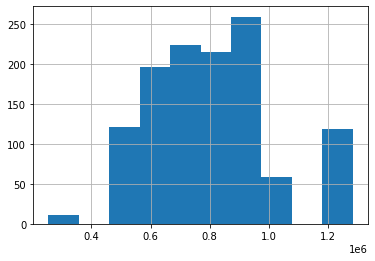

In [206]:
#Univariate analysis

df.Money.hist()
plt.show()

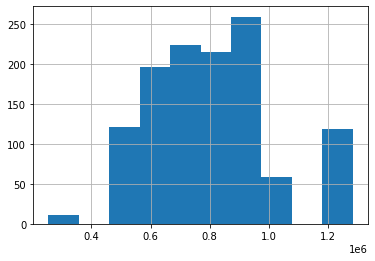

In [207]:
df['Money'].hist()

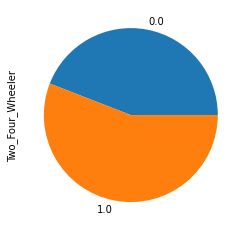

In [208]:
#Composition by city category

df.groupby('Two_Four_Wheeler').Two_Four_Wheeler.count().plot(kind='pie')
plt.show()

In [209]:
#Correlation
df.select_dtypes(['float64','int64']).corr()

,Gender,Age,Married,Employment,Two_Four_Wheeler,Cinema_Likes,Money
Gender,1.000000,0.007282,-0.047333,-0.033862,0.027526,-0.109457,0.010950
Age,0.007282,1.000000,-0.031552,0.010164,0.005518,0.016759,0.062118
Married,-0.047333,-0.031552,1.000000,0.073158,0.009647,0.074019,0.036767
Employment,-0.033862,0.010164,0.073158,1.000000,0.012032,0.001040,0.031390
Two_Four_Wheeler,0.027526,0.005518,0.009647,0.012032,1.000000,0.015637,0.000232
Cinema_Likes,-0.109457,0.016759,0.074019,0.001040,0.015637,1.000000,0.024681
Money,0.010950,0.062118,0.036767,0.031390,0.000232,0.024681,1.000000


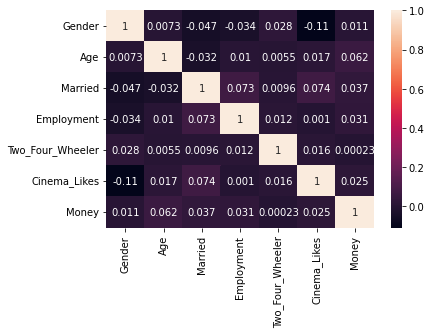

In [210]:
#Heatmap
sns.heatmap(df.select_dtypes(['float64','int64']).corr(),annot=True)
plt.show()

In [211]:
df.columns

Index(['Gender', 'Age', 'Married', 'Employment', 'Two_Four_Wheeler',
       'Cinema_Likes', 'Money'],
      dtype='object')

In [212]:
df.Age.dtypes

dtype('float64')

In [215]:
p0=df.Age.min()
p100=df.Age.max()
q1=df.Age.quantile(0.25)    #25th Quantile value
q2=df.Age.quantile(0.5)     #50th Quantile value
q3=df.Age.quantile(0.75)    #75th Quantile value

iqr=q3 - q1  #Inter quantile  range

In [216]:
lower_cutoff= q1 - 1.5*iqr            #if lower_cutoff<p0 --> There are NO outliers on the lower side
upper_cutoff= q3 + 1.5*iqr            # if upper_cutoff>p100 --> There are NO ouliers in the Upper side
print(lower_cutoff,upper_cutoff)

16.5 28.5


In [217]:
print("p0 =",p0,
      "\np100 =",p100,
      "\nlc =",lower_cutoff,
      "\nuc =",upper_cutoff)

p0 = 6.0 
p100 = 99.0 
lc = 16.5 
uc = 28.5


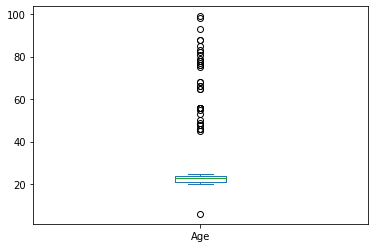

In [219]:
df.Age.plot(kind='box')  #using pandas

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


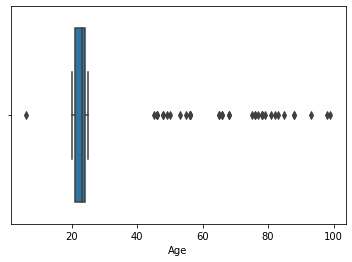

In [221]:
sns.boxplot(df['Age'])   #using Seaborn

{'boxes': [<matplotlib.lines.Line2D at 0x7f7d9cd8c5d0>],
 'caps': [<matplotlib.lines.Line2D at 0x7f7d9cd98350>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f7d9cd23490>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f7d9cd982d0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f7d9cd8ca10>,
  <matplotlib.lines.Line2D at 0x7f7d9cdaf590>]}

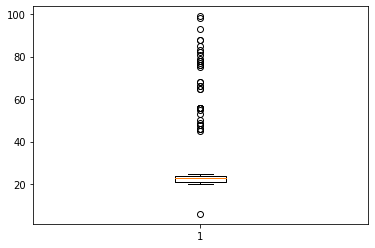

In [222]:
plt.boxplot(df['Age'])   #using Matplotlib

In [223]:
#Outlier Treatment
## Clipping all values greater than the upper cutoff to the upper cutoff

df.Age.clip(upper=upper_cutoff)

0       28.5
1       23.0
2       21.0
3       25.0
4       24.0
        ... 
1197    22.0
1198    25.0
1199    24.0
1200    22.0
1201    20.0
Name: Age, Length: 1202, dtype: float64

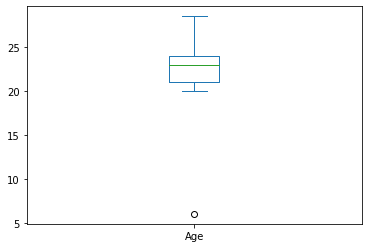

In [224]:
df.Age.clip(upper=upper_cutoff,inplace=True)
df.Age.plot(kind='box')

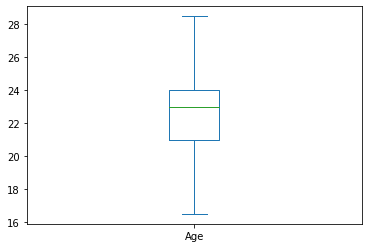

In [226]:
df.Age.clip(lower=lower_cutoff)
df.Age.clip(lower=lower_cutoff,inplace=True)
df.Age.plot(kind='box')

In [227]:
# Handling missing values
df.isna().sum().sort_values(ascending=False)

Gender              0
Age                 0
Married             0
Employment          0
Two_Four_Wheeler    0
Cinema_Likes        0
Money               0
dtype: int64

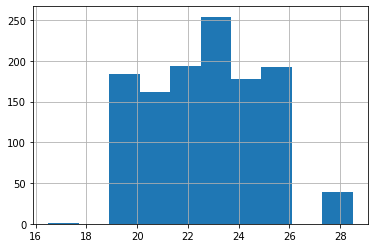

In [228]:
#Univariate analysis

df.Age.hist()
plt.show()

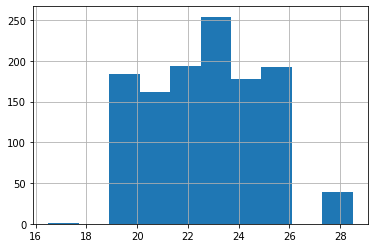

In [229]:
df['Age'].hist()

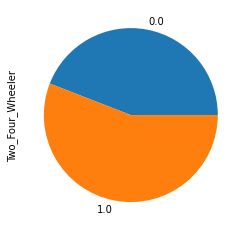

In [230]:
#Composition by city category

df.groupby('Two_Four_Wheeler').Two_Four_Wheeler.count().plot(kind='pie')
plt.show()

In [231]:
#Correlation
df.select_dtypes(['float64','int64']).corr()

,Gender,Age,Married,Employment,Two_Four_Wheeler,Cinema_Likes,Money
Gender,1.000000,-0.019001,-0.047333,-0.033862,0.027526,-0.109457,0.010950
Age,-0.019001,1.000000,-0.040961,-0.011794,0.032776,-0.004643,0.001056
Married,-0.047333,-0.040961,1.000000,0.073158,0.009647,0.074019,0.036767
Employment,-0.033862,-0.011794,0.073158,1.000000,0.012032,0.001040,0.031390
Two_Four_Wheeler,0.027526,0.032776,0.009647,0.012032,1.000000,0.015637,0.000232
Cinema_Likes,-0.109457,-0.004643,0.074019,0.001040,0.015637,1.000000,0.024681
Money,0.010950,0.001056,0.036767,0.031390,0.000232,0.024681,1.000000


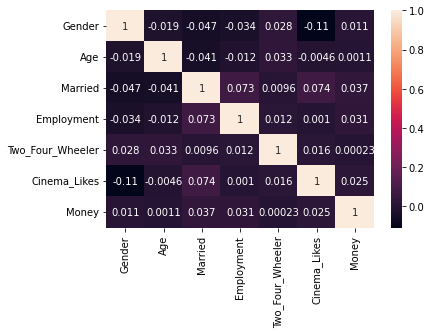

In [232]:
#Heatmap
sns.heatmap(df.select_dtypes(['float64','int64']).corr(),annot=True)
plt.show()